## Applications of Inner Products

### Linear regression

A common example of the use of least squares is Linear Regression.  In this scenario, we suppose that two variables are related through a linear relationship, or we wish to approximate their relationship as linear.  Although data may show that the relationship is not exactly linear, or the data may be subject to experimental error, we might still hope to find the linear model that best fits the data.  This is commonly known as the "line of best fit", or the "least squares line".  

For our example, suppose that we are studying the price of beer and nachos at various entertainment venues, and we collect data from a representative sample of venues.

|Beer|Nachos|
|----|------|
|\$4.5|\$12 |
|\$4.75|\$13|
|\$5.5|\$14.8|
|\$5.9|\$15.5|
|\$6.25|\$15.9|
|\$7 |\$17.25|

We plot the data and notice that there is strong correlation between the two variables.

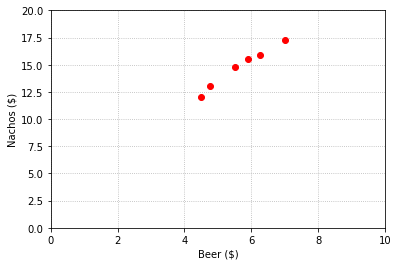

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import laguide as lag

x = np.array([4.5, 4.75, 5.5, 5.9, 6.25, 7])
y = np.array([12, 13, 14.8, 15.5, 15.9, 17.25])

fig,ax = plt.subplots()

ax.plot(x,y,'ro');
ax.set_xlim(0,10);
ax.set_ylim(0,20);
ax.set_xlabel('Beer (\$)');
ax.set_ylabel('Nachos (\$)');

ax.grid('True',ls=':')

Next, we propose a linear equation $n  = x_1b + x_2$ that relates the nacho price, $n$, to the beer price, $b$.  If there were only two data points, we would solve a system of two equations to determine the parameters $x_1$ and $x_2$.  The larger number of data points leads to an inconsistent overdetermined system.

$$
\begin{eqnarray*}
4.5x_1 + x_2 & = & 12 \\
4.75x_1 + x_2 & = & 13 \\
5.5x_1 + x_2 & = & 14.8 \\
5.9x_1 + x_2 & = & 15.5 \\
6.25x_1 + x_2 & = & 15.9 \\
7x_1 + x_2 & = & 17.25 \\
\end{eqnarray*}
$$

We find the least squares solution by solving the normal equations.

In [2]:
A = np.array([[4.5, 1],[4.75, 1],[5.5, 1],[5.9, 1],[6.25, 1],[7, 1]])
B = np.array([[12],[13],[14.8],[15.5],[15.9],[17.25]])

A_LS = A.transpose()@A
B_LS = A.transpose()@B
X_hat = lag.SolveSystem(A_LS,B_LS)
print(X_hat)

[[2.04147727]
 [3.20732008]]


We see that this least squares solution produces a line that fits the data reasonably well.


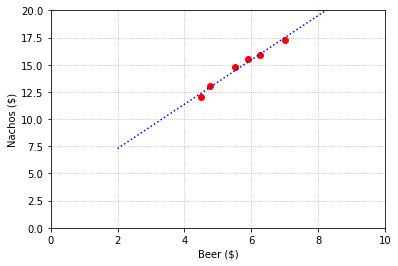

In [3]:
x_model = np.linspace(2,10,40)
y_model = x_model*X_hat[0,0] + X_hat[1,0]

fig,ax = plt.subplots()

ax.plot(x,y,'ro');
ax.plot(x_model,y_model,'b',ls=':');

ax.set_xlim(0,10);
ax.set_ylim(0,20);
ax.set_xlabel('Beer (\$)');
ax.set_ylabel('Nachos (\$)');

ax.grid('True',ls=':')

### Exercises 

**Exercise 1:** The sales of a company (in million dollars) has been shown in the table below:


|Year|Sales|
|----|------|
|2004|13 |
|2006|29|
|2008|35|
|2010|45|
|2012|48|


$(a)$ Find the least squares regression line. Plot the regression line and the data points to show that the line fits the data reasonably well.

$(b)$ Use the regression line model to estimate the sales of the company in 2020.



**Exercise 2:** The concept of least squares can also be used to find polynomials of best fit that are of degree greater than one. Given the points $(-1,0),(0,1),(1,3),$ and $(2,9)$, find the parabola $y = ax^2 + bx + c$ that best fits through the points in the sense of least squares. Then plot the points on top of a graph of the parabola to observe the fit. 

In [ ]:
## Code solution here.

**Exercise 3:** Lets revisit a problem we saw earlier to see how the technique of least squares compares to our previous method of interpolation. Here are the average radii of the orbits of the planets in our solar system, and their average orbital velocity around the Sun.

|Planet                           | Distance from Sun (million km)  | Orbital Velocity (km/s)         |
| ------------------------------- | ------------------------------- | ------------------------------- |
|Mercury                          | 57.9                            | 47.4                            |
|Venus                            | 108.2                           | 35.0                            | 
|Earth                            | 149.6                           | 29.8                            |
|Mars                             | 228.0                           | 24.1                            |
|Jupiter                          | 778.5                           | 13.1                            |
|Saturn                           | 1432.0                          | 9.7                             |
|Uranus                           | 2867.0                          | 6.8                             |
|Neptune                          | 4515.0                          | 5.4                             |

$(a)$ Use the method of least squares to find the cubic polynomial of best fit for these points. Plot the data points together with the graph of the polynomial to observe the fit.

$(b)$ The dwarf planet Ceres has an average distance from the sun of 413.5 million km. What does the polynomial suggest the value would be? How closely does this agree with what the points seem to suggest?

In [ ]:
## Code solution here.

### Information Retrieval

In the earlier section on the applications of [vector spaces](Applications_VS.ipynb) we discussed how documents could be represented as vectors, and how matrix algebra might be used to identify which documents most closely match a set of keywords defined by a search.  Here we describe an alternative that makes use of the fact that dot products can be used to compute the angles between vectors, which can be interpreted as a measure of how closely the vectors align.

Let's again consider the specific example of a database which contains a list of webpages with content related to information retrieval, and that the set of searchable keywords is small.

**\{algorithm, engine, information, google, computations, matrix, optimization, retrieval, search, theory \}**  

Again, suppose we look at just a few titles in such a database.

- Search Engine Algorithms
- How Google Search Optimization Works
- Information Retrieval Theory
- Matrix Models of Information Retrieval
- Theory Behind Search Engines
- Computations in Information Retrieval

Previously, each webpage title was represented by a $1\times 10$ row vector that contained entries of ones for keywords that were included in the title, and zeros for those that were not.  (*For example, Search Engine Algorithms was represented as $[1, 1, 0, 0, 0, 0, 0, 0, 1, 0]$.*)  We now make one minor adjustment to this representation.  Each of these row vectors will be scaled by its magnitude to make it a unit vector.  Thus *Search Engine Algorithms* will be represented by the following vector.


In [4]:
T1_raw = np.array([[1, 1, 0, 0, 0, 0, 0, 0, 1, 0]])
T1_scaled = T1_raw/lag.Magnitude(T1_raw.transpose())
print(np.round(T1_scaled,4))

[[0.5774 0.5774 0.     0.     0.     0.     0.     0.     0.5774 0.    ]]


We will represent the database as a matrix with one such row for each webpage.

In [3]:
T1 = np.array([[1, 1, 0, 0, 0, 0, 0, 0, 1, 0]])
T2 = np.array([[0, 0, 0, 1, 0, 0, 1, 0, 1, 0]])
T3 = np.array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 1]])
T4 = np.array([[0, 0, 1, 0, 0, 1, 0, 1, 0, 0]])
T5 = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 1, 1]])
T6 = np.array([[0, 0, 1, 0, 1, 0, 0, 1, 0, 0]])

D = np.vstack((T1,T2,T3,T4,T5,T6))
D_scaled = lag.ScaleMatrixRows(D)
print(np.round(D_scaled,4))

[[0.5774 0.5774 0.     0.     0.     0.     0.     0.     0.5774 0.    ]
 [0.     0.     0.     0.5774 0.     0.     0.5774 0.     0.5774 0.    ]
 [0.     0.     0.5774 0.     0.     0.     0.     0.5774 0.     0.5774]
 [0.     0.     0.5774 0.     0.     0.5774 0.     0.5774 0.     0.    ]
 [0.     0.5774 0.     0.     0.     0.     0.     0.     0.5774 0.5774]
 [0.     0.     0.5774 0.     0.5774 0.     0.     0.5774 0.     0.    ]]


To perform a search of the database, we construct a $10 \times 1$ vector built in a similar way from the keywords in our search.  Suppose that we want to search for entries matching the words "information", "retrieval", and "matrix".  The unit vector representing our keywords is $[0, 0, 0.5774, 0, 0, 0.5774, 0, 0.5774, 0, 0]^T$.  

At the [start of this chapter](Inner_Products.ipynb) we gave the following formula relating the dot product of two vectors with the cosine of the angle between them.

$$
\begin{equation}
\cos{\theta} = \frac{U\cdot V}{||U||||V||}
\end{equation}
$$

When $U$ and $V$ are unit vectors the formula simplifies to $\cos{\theta} = {U\cdot V}$.  This is the scenario we have constructed by scaling the search vector and database matrix rows to have unit magnitude.  The dot product of our search vector with any row of the database matrix tells us directly the cosine of the angle between the vectors.  In this application, the value of the cosine will always be between zero and one since the entries are all positive values.  The closer the value is to one, the *smaller* the angle between the vectors and the better the directions of the two vectors agree.  

The result of the multiplying the search vector by the database matrix is a vector that contains the dot products of the search vector with each of the rows.  The location of the largest entry corresponds to the row in the matrix that best agrees with the search vector.

In [4]:
S_raw = np.array([[0,0,1,0,0,1,0,1,0,0]])
S_scaled = S_raw.reshape((10,1))/lag.Magnitude(S_raw.transpose())

result = D_scaled@S_scaled
print(np.round(result,4))

[[0.    ]
 [0.    ]
 [0.6667]
 [1.    ]
 [0.    ]
 [0.6667]]


The fourth entry in the vector is one, which means that the fourth webpage in the database contains all of the keywords in the search vector and contains none of the *searchable keywords* that are not in the search vector.

### Exercises

**Exercise 1:** Write a function that performs the same task as the $\texttt{laguide}$ function $\texttt{ScaleMatrixRows}$.  That is, it should accept an $m \times n$ matrix as an argument, and return a matrix where each entry has been divided by the magnitude of the row in which it is located.  Test your function by comparing results with $\texttt{ScaleMatrixRows}$.  

In [7]:
## Code solution here.

**Exercise 2:** The search method described in this section often yields the same results as the one described in [Chapter 3](Applications_VS.ipynb).  Construct an example where the two methods yield *different* results.  
(*Hint: If we ignore the actual words involved, we see the question is one of matrix multiplication.  Let $A$ be a $4\times 6$ database matrix consisting of ones and zeros and let $A_u$ be the matrix returned by $\texttt{ScaleMatrixRows(A)}$.  Let $X$ be a $6\times 1$ search vector consisting of ones and zeros and let $X_u = X/||X||$.  To build the required example, arrange the ones and zeros in $A$ and $X$ such that the largest entry in $AX$ appears in a different location than the largest entry in $A_uX_u$.*)

In [8]:
## Code solution here.

**Exercise 3:** Suppose that we want to search for entries matching the words "information", "retrieval", and "computations". Use the information discussed in this section to determine the webpage in the database which contains all or most of the keywords in the search vector.

In [17]:
## Code solution here

**Exercise 4:** The following example of a database with webpages containing the content related to Global Warming. The set of searchable keywords is: **\{causes, effects, global, warming, fossil-fuels, climate , potentials, change, actions, prevent \}**

Some titles in this database are as follows:

- Causes of Global Warming
- Global Warming vs Climate change
- Fossil Fuels - A Major cause of Global Warming
- Actions to prevent Global Warming
- Potentials of Global Warming
- Effects of Global Warming

Suppose the keywords we want to search are "potentials", "global" and "warming". Create the search vector and database matrix. Analyse the resulting vector to find the webpage containing the most relevant information.

In [18]:
## Code solution here

### References

- Berry, Michael W. and Murray Browne. *Understanding Serach Engines: Mathematical Modeling and Text Retrieval*. 2nd ed., SIAM, 2005 

- Leon, Steven J. *Linear Algebra with Applications*. 9th ed., Pearson., 2015